## Machine Learning Algorithm (Length of Stay).
Objectives for the project
* Group the patient's into 10 or 20 categories
* Build an Algorithm to predict Length of Stay
* Calculate the P-value



## DATA FEATURES

* Admission Date :- The first date the patient was admitted into the hospital.
* Provider Spell end date :- The last date/end date of the patient’s admission into the hospital.

* Length of Stay :- The total period/number of days the patient was admitted into the hospital.

* Age :- The age/how old the patient is.
* Sex Code :- The Patients’ gender 
1 = Male
2= Female.

* The method of discharge from a Hospital Provider Spell.
Codes used in the data: 8, 5, 4, 3, 2, 1


> 1= patient discharged on medical advice.


> 2= discharged by self or relative.


> 3= patient died.


> 8= patient started another episode of care within the same spell (i.e., still in hospital).

*  International Classification of Diseases (ICD) – The Patients diagnosis coded for clinical entry.

* P1_ICD10 3 digits – when written/broken down in the first 3 digits only.

* P1_ICD10 4 digits - when written/broken down in the first 4 digits only.

* ICD SUB GROUP - Secondary diagnosis/diagnosis broken down?.

* ICD CHAPTER NO - ICD Chapters in integers.
* ICD CHAPTER - Class/ Classification of diagnosis.
* A_WARD - attendance at a WARD by a PATIENT for nursing care.


















In [68]:
# Importing Resources for Data analysis
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")


In [69]:
Hospital = pd.read_csv('./Desktop/TrustA.csv')
Hospital.drop(['Unnamed: 0'], axis = 1, inplace = True)
Hospital.head(5)

,ADMISSION.DATE,PROVIDER.SPELL.END.DATE,LENGTHOFSTAY,AGE,SEX_CODE,DISCHARGE_METHOD,P1_ICD10_3DIGIT,P1_ICD10_4DIGIT,P1_FULL.ICD.10.CODE,P2_ICD.10.CODE,ICD_SUB_GROUP,ICDCHAPTER_NO,ICDCHAPTER,A_Ward
0,01/01/2001,11/01/2001,10,79,2,1,R91,R91X,R91X,Z851,Abnormal findings on diagnostic imaging and in...,18,SYMPTOMS AND SIGNS ETC NOT ELSEWHERE CLASSIFIED,WARD 19
1,01/01/2001,04/01/2001,3,18,2,1,J45,J459,J459,NaN,Chronic lower respiratory diseases,10,DISEASES OF THE RESPIRATORY SYSTEM,WARD 22
2,01/01/2001,05/01/2001,4,80,2,1,J44,J440,J440,NaN,Chronic lower respiratory diseases,10,DISEASES OF THE RESPIRATORY SYSTEM,WARD 23
3,01/01/2001,20/01/2001,19,67,1,4,J45,J459,J459,NaN,Chronic lower respiratory diseases,10,DISEASES OF THE RESPIRATORY SYSTEM,MEDICAL ASSESSMENT UNIT B
4,01/01/2001,11/01/2001,10,77,2,1,J44,J440,J440,I48X,Chronic lower respiratory diseases,10,DISEASES OF THE RESPIRATORY SYSTEM,WARD 03


In [70]:
Hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30693 entries, 0 to 30692
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ADMISSION.DATE           30693 non-null  object
 1   PROVIDER.SPELL.END.DATE  30693 non-null  object
 2   LENGTHOFSTAY             30693 non-null  int64 
 3   AGE                      30693 non-null  int64 
 4   SEX_CODE                 30693 non-null  int64 
 5   DISCHARGE_METHOD         30693 non-null  int64 
 6   P1_ICD10_3DIGIT          30693 non-null  object
 7   P1_ICD10_4DIGIT          30693 non-null  object
 8   P1_FULL.ICD.10.CODE      30693 non-null  object
 9   P2_ICD.10.CODE           21268 non-null  object
 10  ICD_SUB_GROUP            30693 non-null  object
 11  ICDCHAPTER_NO            30693 non-null  int64 
 12  ICDCHAPTER               30693 non-null  object
 13  A_Ward                   30693 non-null  object
dtypes: int64(5), object(9)
memory usage: 3

In [71]:
Hospital.describe()

,LENGTHOFSTAY,AGE,SEX_CODE,DISCHARGE_METHOD,ICDCHAPTER_NO
count,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000
mean,12.495097,64.920861,1.519956,1.245887,10.730036
std,18.783971,17.711586,0.499610,0.800497,4.889530
min,0.000000,16.000000,1.000000,1.000000,1.000000
25%,3.000000,53.000000,1.000000,1.000000,9.000000
50%,7.000000,69.000000,2.000000,1.000000,10.000000
75%,14.000000,78.000000,2.000000,1.000000,14.000000
max,362.000000,106.000000,2.000000,8.000000,21.000000


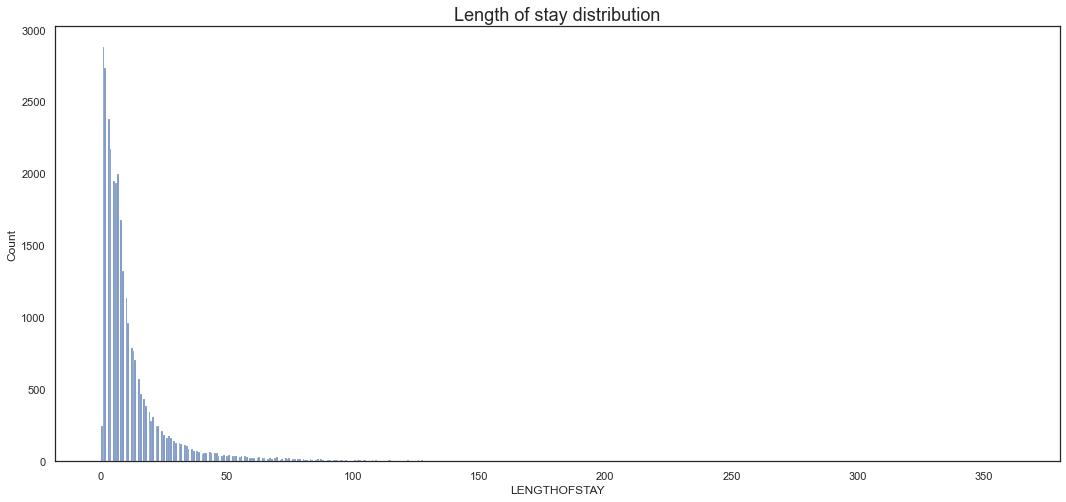

In [72]:
# Visualizing the lenth of stay of patients.
fig, ax = plt.subplots(figsize =(18, 8))
sns.histplot(Hospital['LENGTHOFSTAY'], ax=ax)
ax.set_title('Length of stay distribution', fontsize = 18);

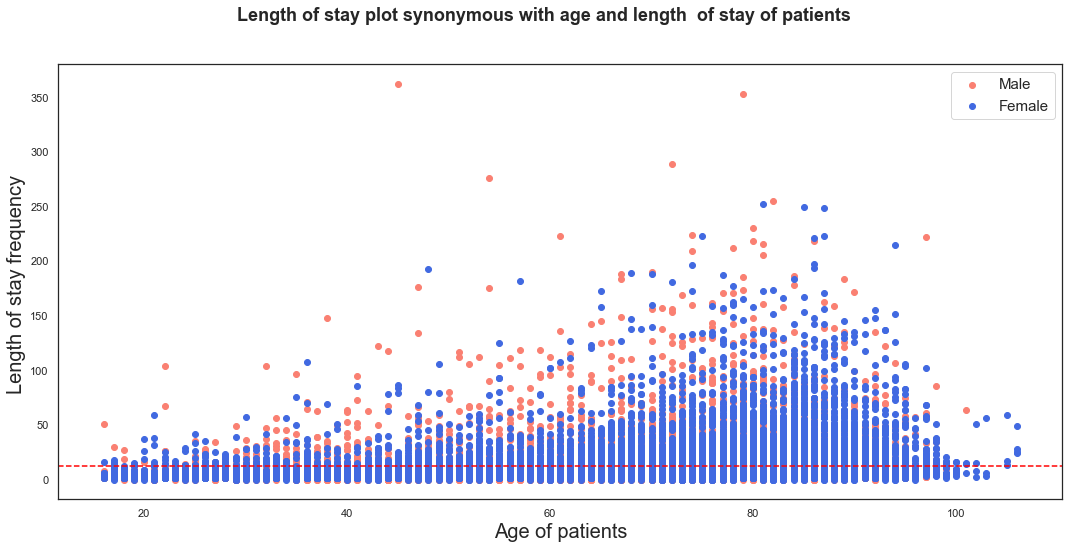

In [73]:
#Calculating the length of stay according to SEX.
plt.figure(figsize = (18, 8))
plt.scatter(Hospital.AGE[Hospital['SEX_CODE']==1],
           Hospital.LENGTHOFSTAY[Hospital['SEX_CODE']== 1],
            c = 'salmon');

plt.scatter(Hospital.AGE[Hospital['SEX_CODE']==2],
           Hospital.LENGTHOFSTAY[Hospital['SEX_CODE']==2],
            c = 'royalblue');

plt.xlabel("Age of patients", fontsize = 20)
plt.ylabel("Length of stay frequency ", fontsize = 20);
plt.legend(["Male", "Female"], fontsize = 15);
plt.rc('axes', labelsize= 15);
plt.suptitle('Length of stay plot synonymous with age and length  of stay of patients', fontsize=18, fontweight = 'bold');

plt.axhline( y = Hospital['LENGTHOFSTAY'].mean(), ls = '--', c = 'red');

In [74]:
Hospital['AGE']

0        79
1        18
2        80
3        67
4        77
         ..
30688    82
30689    36
30690    56
30691    62
30692    75
Name: AGE, Length: 30693, dtype: int64

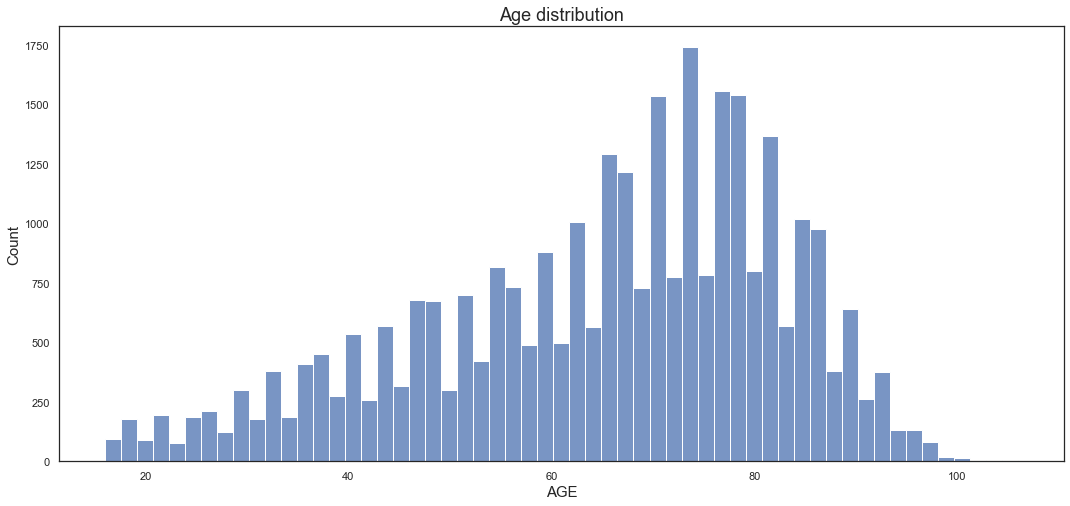

In [75]:
# Visualizing the lenth of stay of patients.
fig, ax = plt.subplots(figsize =(18, 8))
sns.histplot(Hospital['AGE'], ax=ax)
ax.set_title('Age distribution', fontsize = 18);

In [76]:
# Creating an Age group Column to be inserted into the existing Table.
def age_group(x):
    item = [ ]
    if 0 <= x < 30:
       return ('group 0 and 30')  
    elif x < 60:
       return ('group 30 and 60')
    elif x < 90:
       return ('group 60 and 90')
    elif x < 120:
       return ('group 90 and 120')
    else:
       return ('Not in any group')
    item.append(str(x))

  # Creating a function that iterates over the list AGE and returns AGE group.

def space():
  a = [ ]
  for items in Hospital['AGE']:
      b= age_group(items)
      a.append(b)
  return a
# Assigning function to age group.
Age_group = space()
Hospital['AGE_GROUP'] = Age_group

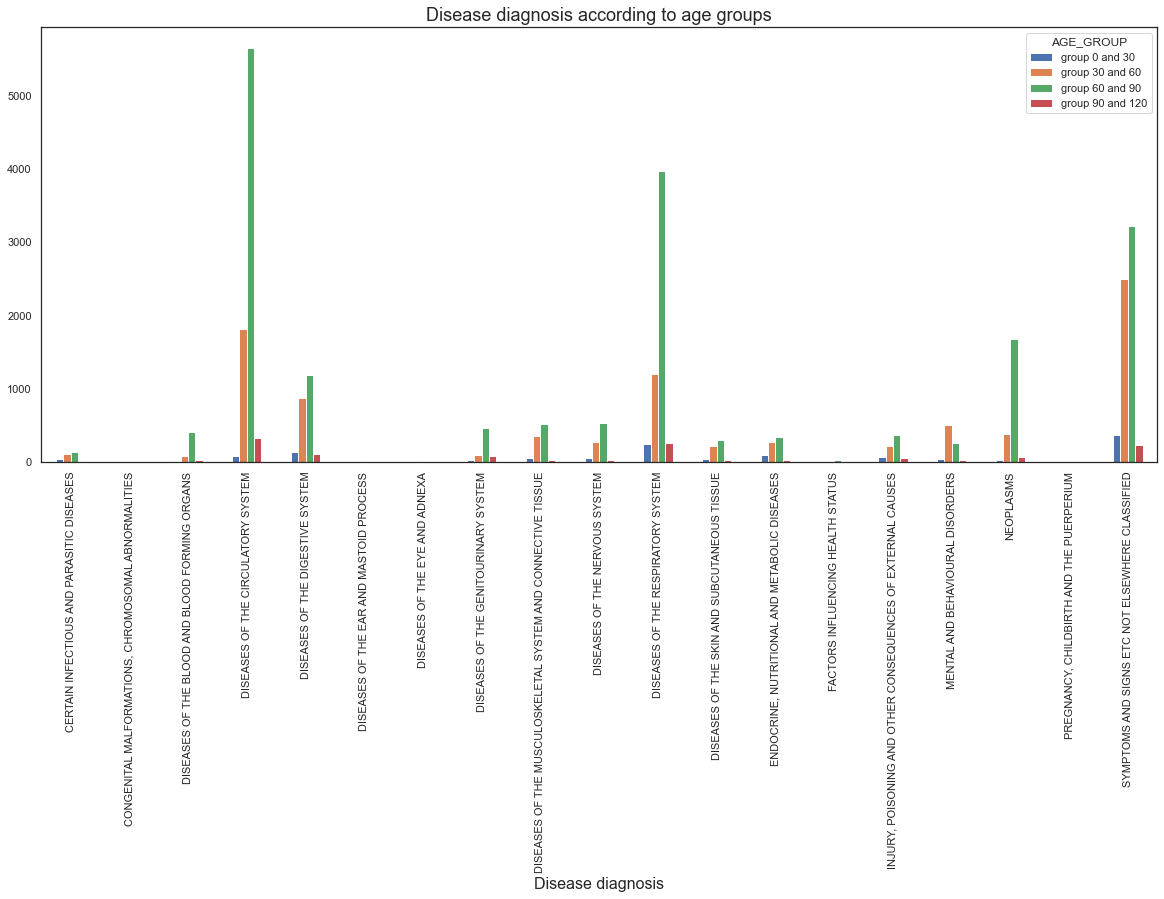

In [77]:
# Calculating disease diagnosis according to Age Group.
Age_diagnosis = pd.crosstab(Hospital['ICDCHAPTER'],Hospital['AGE_GROUP'])



#Creating a Barplot showing diagnosis between age group.
fig, ax = plt.subplots(figsize =(20, 8))
Age_diagnosis.plot(kind ='bar', ax = ax)
ax.set_xlabel('Disease diagnosis', fontsize = 16)
ax.set_title('Disease diagnosis according to age groups', fontsize = 18);

In [78]:
#Discharge method in relation to AGE Groups
new = pd.crosstab(Hospital['DISCHARGE_METHOD'], Hospital['AGE_GROUP'])
new

AGE_GROUP,group 0 and 30,group 30 and 60,group 60 and 90,group 90 and 120
DISCHARGE_METHOD,,,,
1,1233,8376,17143,1047
2,80,358,126,1
3,0,3,4,3
4,4,183,1860,270
5,0,0,1,0
8,0,0,1,0


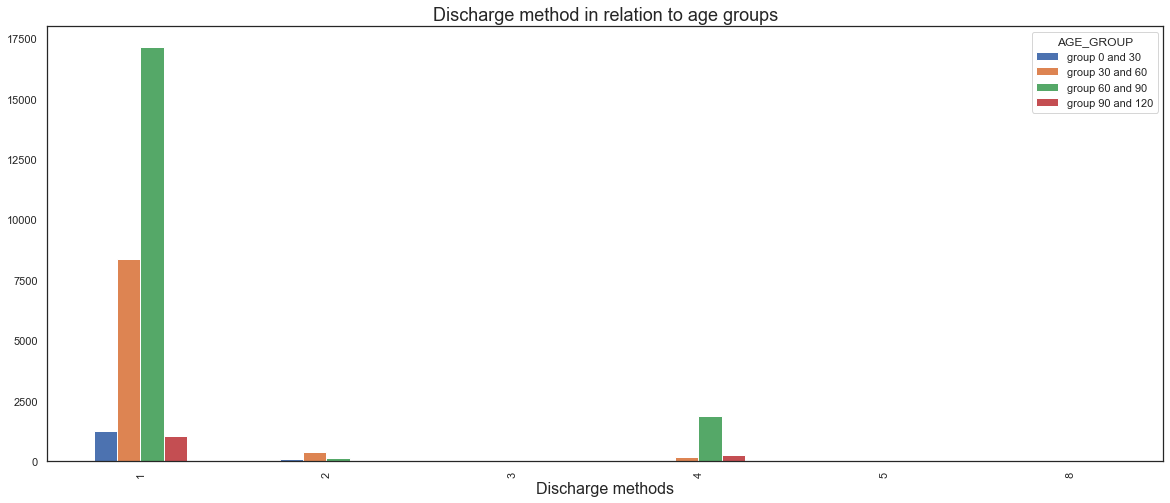

In [79]:
#Visualising Various Discharge Method in relation to Age group
fig, ax = plt.subplots(figsize = (20, 8))
new.plot(kind = 'bar', ax = ax)

ax.set_xlabel('Discharge methods', fontsize = 16)
ax.set_title('Discharge method in relation to age groups', fontsize = 18);

In [80]:
diagnosis = Hospital['ICDCHAPTER'].value_counts()
diagnosis

DISEASES OF THE CIRCULATORY SYSTEM                              7880
SYMPTOMS AND SIGNS ETC NOT ELSEWHERE CLASSIFIED                 6327
DISEASES OF THE RESPIRATORY SYSTEM                              5670
DISEASES OF THE DIGESTIVE SYSTEM                                2314
NEOPLASMS                                                       2154
DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE     966
DISEASES OF THE NERVOUS SYSTEM                                   896
MENTAL AND BEHAVIOURAL DISORDERS                                 839
ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES                    742
INJURY, POISONING AND OTHER CONSEQUENCES OF EXTERNAL CAUSES      704
DISEASES OF THE GENITOURINARY SYSTEM                             672
DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE                     577
DISEASES OF THE BLOOD AND BLOOD FORMING ORGANS                   540
CERTAIN INFECTIOUS AND PARASITIC DISEASES                        308
DISEASES OF THE EAR AND MASTOID PR

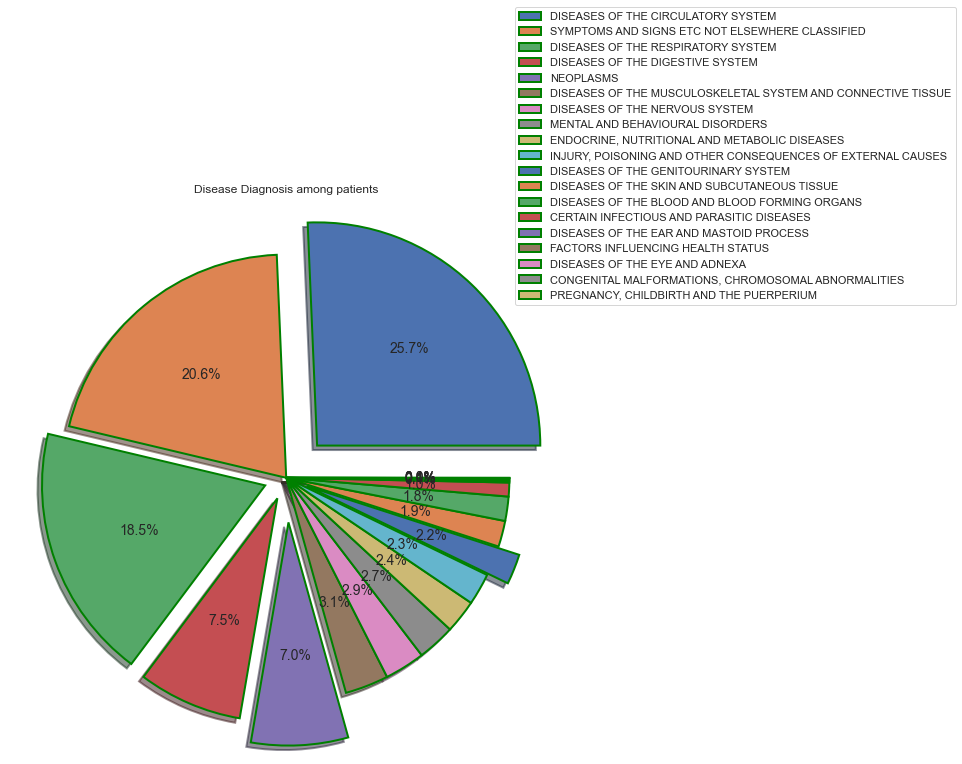

In [81]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

#Visualising Disease Diagnosis for Patients.
diagnosis = Hospital['ICDCHAPTER'].value_counts()

#creating the explode matrix
explode = [0.2, 0, 0.1,0.1,0.2,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0]


fig, ax = plt.subplots(figsize = (10, 16))
ax.pie(diagnosis, shadow = True, 
               wedgeprops= {"edgecolor":"green",
                     'linewidth': 2,
                     'antialiased': True},
               explode = explode, autopct='%1.1f%%')
ax.legend(diagnosis.index, loc = 'lower left', bbox_to_anchor=(0.9, 0.8))
ax.set_title('Disease Diagnosis among patients');

# DATA PREPROCESSING



In [82]:
#Making a copy of the dataset.
Hospital2 = Hospital.copy()

## Creating Date time parameters

In [95]:
Hospital['ADMISSION.DATE'] = pd.to_datetime(Hospital['ADMISSION.DATE'],
                                            errors = 'raise')
Hospital['PROVIDER.SPELL.END.DATE'] = pd.to_datetime(Hospital['PROVIDER.SPELL.END.DATE'], 
                                                     errors = 'raise')


#Creating year and month parameters for admission date.
Hospital['ADMISSION_YEAR'] = Hospital['ADMISSION.DATE'].dt.year
Hospital['ADMISSION_MONTH'] = Hospital['ADMISSION.DATE'].dt.month

#Creating year and month parameters for Discharge Period.
Hospital['DISCHARGE_YEAR'] = Hospital['PROVIDER.SPELL.END.DATE'].dt.year
Hospital['DISCHARGE_MONTH'] = Hospital['PROVIDER.SPELL.END.DATE'].dt.month

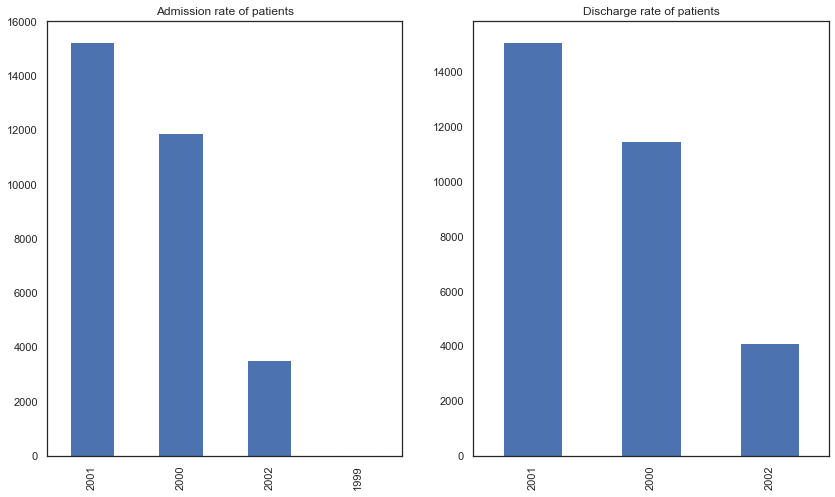

In [130]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, 
                             ncols=2, 
                            figsize=(14, 8))

Hospital['ADMISSION_YEAR'].value_counts().plot(kind = 'bar', ax = ax1)
ax1.set_title('Admission rate of patients')

Hospital['DISCHARGE_YEAR'].value_counts().plot(kind = 'bar', ax = ax2)
ax2.set_title('Discharge rate of patients');

In [138]:
#Converting Strings to categories.

# Find the columns which contain strings
for label, content in Hospital.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

P1_ICD10_3DIGIT
P1_ICD10_4DIGIT
P1_FULL.ICD.10.CODE
P2_ICD.10.CODE
ICD_SUB_GROUP
ICDCHAPTER
A_Ward
AGE_GROUP


In [141]:
# Turn categorical variables into numbers and fill missing
for label, content in Hospital.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        Hospital[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        Hospital[label] = pd.Categorical(content).codes+1

In [144]:
Hospital.head(10).T

,0,1,2,3,4,5,6,7,8,9
ADMISSION.DATE,363,363,363,363,363,363,363,363,363,363
PROVIDER.SPELL.END.DATE,580,366,396,295,580,292,304,580,610,549
LENGTHOFSTAY,10,3,4,19,10,16,28,10,11,9
AGE,79,18,80,67,77,76,106,59,75,66
SEX_CODE,2,2,2,1,2,1,2,1,1,1
DISCHARGE_METHOD,1,1,1,4,1,1,1,1,1,1
P1_ICD10_3DIGIT,553,317,316,317,316,317,316,319,316,132
P1_ICD10_4DIGIT,1109,636,631,636,631,636,634,638,632,238
P1_FULL.ICD.10.CODE,1196,646,641,646,641,646,644,648,642,246
P2_ICD.10.CODE,1359,0,0,0,480,0,421,0,0,558


In [147]:
len(Hospital)

30693